In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [80]:
df = pd.read_csv("Data/RiyadhVillas.csv")
df

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,فيلا,الرياض,حي الفاروق,جنوبية,4,1,4,16.0,756,...,1,0,0,0,0,0,0,0,0,3300000
703,780,فيلا,الرياض,حي الربوة,ثلاث شوارع,7+,2,5+,12.0,868,...,1,1,1,1,1,0,0,1,0,4000000
704,781,فيلا,الرياض,حي الربوة,شمالية,4,2,4,20.0,1601,...,1,1,1,1,1,1,0,1,0,6564100
705,782,فيلا,الرياض,حي الخالدية,شمالية شرقية,5,2,5+,15.0,480,...,1,0,0,0,0,0,0,0,0,1200000


In [81]:
df.isnull().sum()

Unnamed: 0          0
نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات        16
عدد الحمامات        0
عرض الشارع        325
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [82]:
df['عدد الصالات']=df['عدد الصالات'].fillna(method='ffill')

In [83]:
df.isnull().sum()

Unnamed: 0          0
نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات         0
عدد الحمامات        0
عرض الشارع        325
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [84]:
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


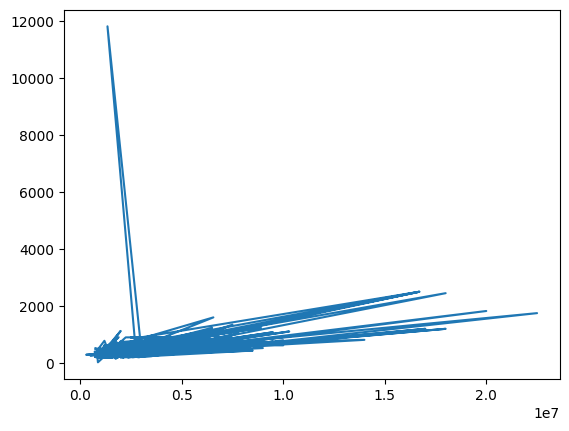

In [85]:
plt.plot(df['السعر الاجمالي'], df['المساحة'])

In [86]:
df.loc[(df['المساحة'] > 5000)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
128,150,فيلا,الرياض,حي العارض,غربية,3,2,5+,NaN,11811,...,1,1,0,0,0,0,0,0,0,1350000


In [87]:
df.drop(128, inplace=True) 

In [88]:
df.loc[(df['المساحة'] > 5000)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي


In [40]:
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


In [89]:
df['عدد الحمامات'] = df['عدد الحمامات'].str[0:1]
df['عدد الغرف'] = df['عدد الغرف'].str[0:1]
df['عدد الصالات'] = df['عدد الصالات'].str[0:1]
df.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


In [90]:
df['نوع العقار'].value_counts()

نوع العقار
فيلا    706
Name: count, dtype: int64

In [91]:
df['الواجهة'].value_counts()

الواجهة
شمالية          180
جنوبية          157
غربية           140
شرقية           137
شمالية شرقية     25
جنوبية غربية     25
شمالية غربية     21
جنوبية شرقية     17
ثلاث شوارع        4
Name: count, dtype: int64

In [92]:
df.shape

(706, 21)

In [93]:
dt = pd.get_dummies(df, columns=['الحي'])
dt.head()

,Unnamed: 0,نوع العقار,المدينة,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,فيلا,الرياض,جنوبية,6,3,5,NaN,244,1,...,False,False,False,False,False,False,False,False,False,False
1,1,فيلا,الرياض,جنوبية,6,4,5,NaN,322,1,...,False,False,False,False,False,False,False,False,False,False
2,2,فيلا,الرياض,جنوبية,3,2,5,NaN,350,1,...,False,False,False,False,False,False,False,False,False,False
3,3,فيلا,الرياض,جنوبية,4,4,4,NaN,350,1,...,False,False,False,False,False,False,False,False,False,False
4,6,فيلا,الرياض,غربية,4,1,5,NaN,270,1,...,False,False,False,False,False,False,False,False,False,False


In [94]:
dt = pd.get_dummies(dt, columns=['الواجهة'])
dt.head()

,Unnamed: 0,نوع العقار,المدينة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,فيلا,الرياض,6,3,5,NaN,244,1,1,...,False,False,True,False,False,False,False,False,False,False
1,1,فيلا,الرياض,6,4,5,NaN,322,1,1,...,False,False,True,False,False,False,False,False,False,False
2,2,فيلا,الرياض,3,2,5,NaN,350,1,0,...,False,False,True,False,False,False,False,False,False,False
3,3,فيلا,الرياض,4,4,4,NaN,350,1,1,...,False,False,True,False,False,False,False,False,False,False
4,6,فيلا,الرياض,4,1,5,NaN,270,1,1,...,False,False,False,False,False,False,False,False,False,True


In [95]:
dt.drop(['نوع العقار', 'المدينة', 'عرض الشارع'], axis=1, inplace=True) 

In [96]:
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,False,False,True,False,False,False,False,False,False,False
1,1,6,4,5,322,1,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,2,3,2,5,350,1,0,1,0,1,...,False,False,True,False,False,False,False,False,False,False
3,3,4,4,4,350,1,1,1,0,0,...,False,False,True,False,False,False,False,False,False,False
4,6,4,1,5,270,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,True


In [97]:
dt.replace({False:0, True:1}, inplace= True)
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


KeyError: 'السعر الاجمالي'

In [103]:
dt.drop(['السعر الاجمالي'], axis=1)

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,4,1,4,756,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
703,780,7,2,5,868,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
704,781,4,2,4,1601,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
705,782,5,2,5,480,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [104]:
dt['السعر الاجمالي'] = df['السعر الاجمالي']
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
dt['السعر الاجمالي']

0      2300000
1      3000000
2      2600000
3      2600000
4      2800000
        ...   
702    3300000
703    4000000
704    6564100
705    1200000
706    2100000
Name: السعر الاجمالي, Length: 706, dtype: int64

In [109]:
dt.columns

Index(['Unnamed: 0', 'عدد الغرف', 'عدد الصالات', 'عدد الحمامات', 'المساحة',
       'درج صالة', 'مطبخ', 'غرفة خادمة', 'غرفة سائق', 'ملحق',
       ...
       'الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل ', 'الواجهة_ثلاث شوارع',
       'الواجهة_جنوبية', 'الواجهة_جنوبية شرقية', 'الواجهة_جنوبية غربية',
       'الواجهة_شرقية', 'الواجهة_شمالية', 'الواجهة_شمالية شرقية',
       'الواجهة_شمالية غربية', 'الواجهة_غربية'],
      dtype='object', length=119)

In [110]:
dt.head()

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,...,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل,الواجهة_ثلاث شوارع,الواجهة_جنوبية,الواجهة_جنوبية شرقية,الواجهة_جنوبية غربية,الواجهة_شرقية,الواجهة_شمالية,الواجهة_شمالية شرقية,الواجهة_شمالية غربية,الواجهة_غربية
0,0,6,3,5,244,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,6,4,5,322,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,5,350,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,4,4,4,350,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6,4,1,5,270,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
x = dt.drop('السعر الاجمالي', axis=1)
y = dt['السعر الاجمالي']

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [162]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state =42)

In [166]:
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [167]:
pred = model.predict(xtest).astype('int32')

C:\Users\walee\AppData\Local\Temp\ipykernel_12832\4177968340.py:1: RuntimeWarning: invalid value encountered in cast
  pred = model.predict(xtest).astype('int32')


In [168]:
print(pred[10])
print(ytest[10])

[3284813]
[3600000]


In [169]:
testscore = model.score(xtest, ytest)
print('test score: ',testscore)

trainscore = model.score(xtrain, ytrain)
print('train score: ',trainscore)

test score:  -1.52777081279765e+17
train score:  0.8813872137422614


In [131]:
pred

array([[    1334469],
       [    4597445],
       [    3876051],
       [    8061288],
       [    1480071],
       [    1812487],
       [     945250],
       [    4532593],
       [    1568264],
       [    2702695],
       [    3284813],
       [    5539292],
       [    2165010],
       [    2530164],
       [    2592947],
       [    4243267],
       [    4464033],
       [     822160],
       [    2197593],
       [-2147483648],
       [    6967915],
       [     911661],
       [    1108018],
       [    1786531],
       [    2022692],
       [    9654569],
       [    1775652],
       [    2283890],
       [    2095391],
       [    2774448],
       [-2147483648],
       [    1338682],
       [    1177803],
       [    1629596],
       [     589668],
       [    4150158],
       [    1791753],
       [    3651809],
       [     826338],
       [    4139353],
       [-2147483648],
       [    2351930],
       [    2786544],
       [    2203925],
       [    6114020],
       [  

In [157]:
df3 = pd.DataFrame(data={'Predicted Values': pred.flatten(), 'Actual Values': ytest.flatten()})
df3.head(25)

,Predicted Values,Actual Values
0,503980,1070000
1,9267992,10000000
2,809568,900000
3,4076826,5800000
4,685146,1550000
5,-2147483648,4000000
6,1019006,1700000
7,985236,1200000
8,1393946,1470000
9,972168,830000


In [134]:
r2_score(ytest, pred)

-33770.63378253116

In [147]:
dt['السعر الاجمالي'].head(22

0      2300000
1      3000000
2      2600000
3      2600000
4      2800000
5      3500000
6      4500000
7      2800000
8     17000000
9      3600000
10     2500000
11     8500000
12     3000000
13     3000000
14     8500000
15     2450000
16     3600000
17     2200000
18     6000000
19     2650000
20     2600000
21     8000000
Name: السعر الاجمالي, dtype: int64

In [173]:
ds= df
ds.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,NaN,244,...,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,NaN,322,...,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,NaN,350,...,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350,...,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5,NaN,270,...,1,1,1,0,0,0,0,1,0,2800000


In [174]:
ds.shape

(706, 21)

In [175]:
ds.isnull().sum()

Unnamed: 0          0
نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات         0
عدد الحمامات        0
عرض الشارع        324
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [182]:
ds['عرض الشارع'].fillna(method= 'ffill', inplace= True) 
ds['عرض الشارع'].fillna(method= 'bfill', inplace= True) 


In [183]:
ds.isnull().sum()

Unnamed: 0        0
نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
عرض الشارع        0
المساحة           0
درج صالة          0
مطبخ              0
غرفة خادمة        0
غرفة سائق         0
ملحق              0
حوش               0
مسبح              0
قبو               0
مدخل سيارة        0
مصعد              0
السعر الاجمالي    0
dtype: int64

In [188]:
ds.loc[(ds['المساحة'] > 5000)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,...,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي


In [252]:
pd.set_option('display.max_columns', 110)

In [ ]:
ds.drop([

In [190]:
ds.head()

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,15.0,244,1,1,1,1,0,1,0,0,1,1,2300000
1,1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,15.0,322,1,1,1,1,1,1,0,0,1,1,3000000
2,2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,15.0,350,1,0,1,0,1,0,0,1,1,1,2600000
3,3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,15.0,350,1,1,1,0,0,1,0,1,1,1,2600000
4,6,فيلا,الرياض,حي العارض,غربية,4,1,5,15.0,270,1,1,1,1,0,0,0,0,1,0,2800000


In [191]:
ds = pd.get_dummies(ds, columns=['الحي'])
ds.head()

,Unnamed: 0,نوع العقار,المدينة,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,...,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,فيلا,الرياض,جنوبية,6,3,5,15.0,244,1,1,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,فيلا,الرياض,جنوبية,6,4,5,15.0,322,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,فيلا,الرياض,جنوبية,3,2,5,15.0,350,1,0,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,فيلا,الرياض,جنوبية,4,4,4,15.0,350,1,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6,فيلا,الرياض,غربية,4,1,5,15.0,270,1,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
ds.replace({False:0, True:1}, inplace= True)
ds.head()

,Unnamed: 0,نوع العقار,المدينة,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,فيلا,الرياض,جنوبية,6,3,5,15.0,244,1,1,1,1,0,1,0,0,1,1,2300000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,فيلا,الرياض,جنوبية,6,4,5,15.0,322,1,1,1,1,1,1,0,0,1,1,3000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,فيلا,الرياض,جنوبية,3,2,5,15.0,350,1,0,1,0,1,0,0,1,1,1,2600000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,فيلا,الرياض,جنوبية,4,4,4,15.0,350,1,1,1,0,0,1,0,1,1,1,2600000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,فيلا,الرياض,غربية,4,1,5,15.0,270,1,1,1,1,0,0,0,0,1,0,2800000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
x1 = ds.drop(['السعر الاجمالي','قبو','عرض الشارع','نوع العقار','المدينة','الواجهة','درج صالة','مطبخ','غرفة خادمة','غرفة سائق','ملحق','حوش','مسبح','مدخل سيارة','مصعد'], axis=1)
y1 = ds['السعر الاجمالي']

#x1 = x1.to_numpy()
y1 = y1.to_numpy()
y1 = y1.reshape(-1, 1)

In [241]:
x1

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,الحي_ حي الربيع,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,6,3,5,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6,4,5,322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,2,5,350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,4,1,5,270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,4,1,4,756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703,780,7,2,5,868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
704,781,4,2,4,1601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
705,782,5,2,5,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [262]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.2, random_state =0)

In [263]:
model = LinearRegression()
model.fit(x1train, y1train)

LinearRegression()

In [264]:
pred1 = model.predict(x1test).astype('int32')

C:\Users\walee\AppData\Local\Temp\ipykernel_12832\2828918105.py:1: RuntimeWarning: invalid value encountered in cast
  pred1 = model.predict(x1test).astype('int32')


In [267]:
testscore = model.score(x1test, y1test)
print('test score: ',testscore)

trainscore = model.score(x1train, y1train)
print('train score: ',trainscore)

test score:  -7.190100625789441e+17
train score:  0.8441584879932439


In [265]:
pred1

array([[    1967619],
       [-2147483648],
       [    6548167],
       [    5549304],
       [    1315105],
       [   17706396],
       [    2395215],
       [    4101310],
       [    5430320],
       [    2377546],
       [    1139484],
       [    5915817],
       [    1410826],
       [    1695610],
       [    6731264],
       [    2744177],
       [    6886985],
       [     708352],
       [     137770],
       [   11672854],
       [     461542],
       [    2533530],
       [    1965018],
       [    3192878],
       [    1245401],
       [    2685240],
       [    1625736],
       [-2147483648],
       [     197313],
       [    3179181],
       [    9091642],
       [    1446884],
       [    4734870],
       [    1453615],
       [    2103902],
       [    3140679],
       [    3242163],
       [    1355409],
       [    1477154],
       [    1004868],
       [    1766055],
       [    1377505],
       [    2972588],
       [    8667755],
       [     618470],
       [  

In [269]:
df5 = pd.DataFrame(data={'Predicted Values': pred1.flatten(), 'Actual Values': y1test.flatten()})
df5.head(40)

,Predicted Values,Actual Values
0,1967619,1100000
1,-2147483648,1200000
2,6548167,5500000
3,5549304,5000000
4,1315105,1400000
5,17706396,16700000
6,2395215,2000000
7,4101310,4300000
8,5430320,3400000
9,2377546,2200000


In [253]:
f.loc[(f['السعر الاجمالي'] ==2700000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,الحي_ حي الربيع,الحي_ حي الرحمانية,الحي_ حي الرفيعة,الحي_ حي الرمال,الحي_ حي الروابي,الحي_ حي الروضة,الحي_ حي الريان,الحي_ حي الزهراء,الحي_ حي الزهرة,الحي_ حي السعادة,الحي_ حي السلام,الحي_ حي السويدي الغربي,الحي_ حي الشفا,الحي_ حي الشهداء,الحي_ حي الصحافة,الحي_ حي الصفا,الحي_ حي العارض,الحي_ حي العريجاء الغربي,الحي_ حي العريجاء الغربية,الحي_ حي العريجاء الوسطى,الحي_ حي العزيزية,الحي_ حي العقيق,الحي_ حي العليا,الحي_ حي العوالي,الحي_ حي الفاروق,الحي_ حي الفلاح,الحي_ حي الفيحاء,الحي_ حي القادسية,الحي_ حي القدس,الحي_ حي القيروان,الحي_ حي المحمدية,الحي_ حي المروج,الحي_ حي المصيف,الحي_ حي المعيزلة,الحي_ حي الملز,الحي_ حي الملقا,الحي_ حي الملقا7541,الحي_ حي الملك فهد,الحي_ حي الملك فيصل,الحي_ حي المناخ,الحي_ حي المنار,الحي_ حي المهدية,الحي_ حي المونسية,الحي_ حي النخيل,الحي_ حي الندى,الحي_ حي النرجس,الحي_ حي النزهة,الحي_ حي النسيم الشرقي,الحي_ حي النسيم الغربي,الحي_ حي النظيم,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
89,111,5,2,5,313,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104,126,3,2,5,273,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,154,5,2,5,360,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,229,5,2,5,270,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210,232,5,2,5,312,2700000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,272,5,3,5,240,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
330,376,7,4,5,750,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
553,620,7,3,5,450,2700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
f.loc[(f['السعر الاجمالي'] ==1150000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
381,427,7,2,5,250,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385,431,6,3,4,300,1150000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,541,5,3,5,280,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
512,579,4,2,4,500,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519,586,4,3,5,400,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
615,690,5,3,5,312,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,713,7,2,5,350,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
701,778,5,1,3,274,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
f.loc[(f['السعر الاجمالي'] ==4400000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
112,134,5,3,5,375,4400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
258,290,7,2,5,360,4400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
430,476,7,3,5,950,4400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541,608,7,4,5,450,4400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
f.loc[(f['السعر الاجمالي'] ==2600000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
2,2,3,2,5,350,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,350,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,24,4,3,5,274,2600000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,83,5,3,5,280,2600000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,133,7,2,5,442,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125,147,7,3,5,200,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,158,4,1,3,209,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,167,5,3,5,308,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171,193,5,3,5,250,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,226,4,1,5,252,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [254]:
f.loc[(f['السعر الاجمالي'] ==8200000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,الحي_ حي الربيع,الحي_ حي الرحمانية,الحي_ حي الرفيعة,الحي_ حي الرمال,الحي_ حي الروابي,الحي_ حي الروضة,الحي_ حي الريان,الحي_ حي الزهراء,الحي_ حي الزهرة,الحي_ حي السعادة,الحي_ حي السلام,الحي_ حي السويدي الغربي,الحي_ حي الشفا,الحي_ حي الشهداء,الحي_ حي الصحافة,الحي_ حي الصفا,الحي_ حي العارض,الحي_ حي العريجاء الغربي,الحي_ حي العريجاء الغربية,الحي_ حي العريجاء الوسطى,الحي_ حي العزيزية,الحي_ حي العقيق,الحي_ حي العليا,الحي_ حي العوالي,الحي_ حي الفاروق,الحي_ حي الفلاح,الحي_ حي الفيحاء,الحي_ حي القادسية,الحي_ حي القدس,الحي_ حي القيروان,الحي_ حي المحمدية,الحي_ حي المروج,الحي_ حي المصيف,الحي_ حي المعيزلة,الحي_ حي الملز,الحي_ حي الملقا,الحي_ حي الملقا7541,الحي_ حي الملك فهد,الحي_ حي الملك فيصل,الحي_ حي المناخ,الحي_ حي المنار,الحي_ حي المهدية,الحي_ حي المونسية,الحي_ حي النخيل,الحي_ حي الندى,الحي_ حي النرجس,الحي_ حي النزهة,الحي_ حي النسيم الشرقي,الحي_ حي النسيم الغربي,الحي_ حي النظيم,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
213,235,5,3,5,750,8200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [255]:
f.loc[(f['السعر الاجمالي'] ==5800000)]

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,الحي_ حي الربيع,الحي_ حي الرحمانية,الحي_ حي الرفيعة,الحي_ حي الرمال,الحي_ حي الروابي,الحي_ حي الروضة,الحي_ حي الريان,الحي_ حي الزهراء,الحي_ حي الزهرة,الحي_ حي السعادة,الحي_ حي السلام,الحي_ حي السويدي الغربي,الحي_ حي الشفا,الحي_ حي الشهداء,الحي_ حي الصحافة,الحي_ حي الصفا,الحي_ حي العارض,الحي_ حي العريجاء الغربي,الحي_ حي العريجاء الغربية,الحي_ حي العريجاء الوسطى,الحي_ حي العزيزية,الحي_ حي العقيق,الحي_ حي العليا,الحي_ حي العوالي,الحي_ حي الفاروق,الحي_ حي الفلاح,الحي_ حي الفيحاء,الحي_ حي القادسية,الحي_ حي القدس,الحي_ حي القيروان,الحي_ حي المحمدية,الحي_ حي المروج,الحي_ حي المصيف,الحي_ حي المعيزلة,الحي_ حي الملز,الحي_ حي الملقا,الحي_ حي الملقا7541,الحي_ حي الملك فهد,الحي_ حي الملك فيصل,الحي_ حي المناخ,الحي_ حي المنار,الحي_ حي المهدية,الحي_ حي المونسية,الحي_ حي النخيل,الحي_ حي الندى,الحي_ حي النرجس,الحي_ حي النزهة,الحي_ حي النسيم الشرقي,الحي_ حي النسيم الغربي,الحي_ حي النظيم,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
212,234,4,1,5,420,5800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229,251,3,7,5,480,5800000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [251]:
f.loc[235]

Unnamed: 0                                       257
عدد الغرف                                          6
عدد الصالات                                        2
عدد الحمامات                                       5
المساحة                                          820
                                                ... 
الحي_ حي نمار                                      0
الحي_ حي هجرة لبن                                  0
الحي_ شارع جبل مره                                 0
الحي_ شارع سعيد السلمي                             0
الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل       0
Name: 235, Length: 100, dtype: object

In [244]:
f = ds.drop(['قبو','عرض الشارع','نوع العقار','المدينة','الواجهة','درج صالة','مطبخ','غرفة خادمة','غرفة سائق','ملحق','حوش','مسبح','مدخل سيارة','مصعد'], axis=1)
f

,Unnamed: 0,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,السعر الاجمالي,الحي_,الحي_ الرياض,الحي_ الطريق الدائري الغربي,الحي_ العيينة,الحي_ القرينه,الحي_ حي احد,الحي_ حي اشبيلية,الحي_ حي الازدهار,الحي_ حي الاسكان,الحي_ حي الاندلس,الحي_ حي البيان,الحي_ حي التعاون,الحي_ حي الجنادرية,الحي_ حي الحزم,الحي_ حي الحمراء,الحي_ حي الخالدية,الحي_ حي الخليج,الحي_ حي الدار البيضاء,الحي_ حي الربوة,...,الحي_ حي النفل,الحي_ حي النهضة,الحي_ حي الوادي,الحي_ حي الياسمين,الحي_ حي اليرموك,الحي_ حي بدر,الحي_ حي جامعة الملك سعود,الحي_ حي جرير,الحي_ حي حطين,الحي_ حي شبرا,الحي_ حي صلاح الدين,الحي_ حي طويق,الحي_ حي طيبة,الحي_ حي ظهرة البديعة,الحي_ حي ظهرة لبن,الحي_ حي عكاظ,الحي_ حي غرناطة,الحي_ حي قرطبة,الحي_ حي لبن,الحي_ حي مطار الملك خالد الدولي,الحي_ حي نمار,الحي_ حي هجرة لبن,الحي_ شارع جبل مره,الحي_ شارع سعيد السلمي,الحي_ طريق الامير مساعد بن عبدالرحمن بن فيصل
0,0,6,3,5,244,2300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6,4,5,322,3000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,2,5,350,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,350,2600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,4,1,5,270,2800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,779,4,1,4,756,3300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703,780,7,2,5,868,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
704,781,4,2,4,1601,6564100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
705,782,5,2,5,480,1200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
df.loc[(df['المساحة'] >= 500)]

,Unnamed: 0,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
8,11,فيلا,الرياض,حي النخيل,شمالية غربية,6,3,5,15.0,1200,1,1,1,1,1,1,1,1,1,1,17000000
11,14,فيلا,الرياض,حي الملقا,جنوبية,6,3,5,15.0,600,1,1,1,1,1,1,1,0,1,1,8500000
21,25,فيلا,الرياض,حي النخيل,جنوبية,6,2,5,15.0,750,1,1,1,1,1,1,1,0,1,0,8000000
22,26,فيلا,الرياض,حي العارض,شمالية,6,3,5,15.0,500,1,1,1,1,1,1,1,0,1,1,5550000
24,29,فيلا,الرياض,حي الملقا,شمالية غربية,7,3,5,15.0,1200,1,1,1,1,1,1,1,0,1,1,18000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,771,فيلا,الرياض,حي العزيزية,جنوبية,7,3,5,20.0,608,1,1,1,0,1,1,0,0,1,0,1700000
702,779,فيلا,الرياض,حي الفاروق,جنوبية,4,1,4,16.0,756,1,1,0,0,0,0,0,0,0,0,3300000
703,780,فيلا,الرياض,حي الربوة,ثلاث شوارع,7,2,5,12.0,868,1,1,1,1,1,1,0,0,1,0,4000000
704,781,فيلا,الرياض,حي الربوة,شمالية,4,2,4,20.0,1601,1,1,1,1,1,1,1,0,1,0,6564100


In [272]:
model3 = RandomForestRegressor()
model3.fit(x1train, y1train)

C:\Users\walee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [273]:
pred3 = model3.predict(x1test).astype('int32')

In [274]:
pred3

array([ 2566200,  1273991,  5321940,  4005750,  1731800, 18189000,
        2263202,  2567000,  2949300,  2195200,  1179406,  4476100,
        1706100,  1763600,  5057840,  3692200,  5627800,   861250,
         856000, 11457641,  1981600,  2947800,  2376100,  2694800,
        1714400,  2646900,  1848509,  1589300,   999250,  2635000,
        8469250,  1301000,  5412000,  2613900,  2182800,  2914840,
        2329400,  1662216,  1087600,  1020600,  1516600,  2137303,
        2552780, 11387641,   875700,  1667600,  2182900,  1942300,
        4442700,  1893700,  2675000,  3389000,  3107250,  2018800,
        1772500,  1459600,  6686130,  1924600,  3399500,  2184239,
        1588602,   940600,  2073202,  1067800,  1476204,  1831200,
        1683000,  1165100,  3295080,  1339700,  2123700,  2620000,
        5097000,  1859200,  1816025,  8209190,  5606250,   863850,
        1141700,  1269504,  2384898,  1966200,  2918800,  3593940,
        1333902,   950650,  1347902,  1539300,  1880700,  1684

In [276]:
df7 = pd.DataFrame(data={'Predicted Values': pred3.flatten(), 'Actual Values': y1test.flatten()})
df7.head(40)

,Predicted Values,Actual Values
0,2566200,1100000
1,1273991,1200000
2,5321940,5500000
3,4005750,5000000
4,1731800,1400000
5,18189000,16700000
6,2263202,2000000
7,2567000,4300000
8,2949300,3400000
9,2195200,2200000


In [278]:
from sklearn import metrics

In [280]:
print(metrics.accuracy_score(y1test, pred3))

0.0


In [281]:
testscore3 = model3.score(x1test, y1test)
print('test score: ',testscore3)

trainscore3 = model3.score(x1train, y1train)
print('train score: ',trainscore3)

test score:  0.852949846924705
train score:  0.9687814115633097


In [282]:
model3.score(x1test, y1test)

0.852949846924705

In [284]:
model4 = RandomForestRegressor()
model4.fit(xtrain, ytrain)

C:\Users\walee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [285]:
pred4 = model4.predict(xtest).astype('int32')

In [286]:
pred4

array([ 1266002,  5975940,  5510880,  9291141,  2104300,  1890600,
        1551300,  3654000,  1251100,  3978620,  2787500,  5435000,
        1933000,  2093500,  3441400,  4025040,  3445280,  1603700,
        2276216,  3918700,  8703641,   884000,  1101000,  2344200,
        2217123,  6195690,  1970000,  2560000,  1851600,  2526500,
       15484532,  1560900,  1194606,  1702900,   849700,  2960300,
        1876700,  3621500,   897950,  3003000,  4563300,  1754400,
        1948300,  1580554,  6197000,  1857500,  1074500,  2055160,
        1027900,  3011600,  1035100,  5019000,  1778400,  1934800,
        2644800,  1491100,  3659000,  1533400,   966350,   903500,
        1251700,  2082100,  1726425,   892000,  1713000,  2177400,
         837750,  1425700,  1199000, 12729190,  2852000,  7316750,
        2660100,  2029700,  2608100,  1727500,  4015980,  5438200,
        6103690,   849950, 11348000,   887200,  2622869,  3347440,
        1859900,  2162300,  2194000,  1926907,  1625200,  1861

In [287]:
df9 = pd.DataFrame(data={'Predicted Values': pred4.flatten(), 'Actual Values': ytest.flatten()})
df9.head(40)

,Predicted Values,Actual Values
0,1266002,1250000
1,5975940,5500000
2,5510880,4000000
3,9291141,10300000
4,2104300,1200000
5,1890600,2100000
6,1551300,1100000
7,3654000,3000000
8,1251100,1400000
9,3978620,3200000


In [288]:
model4.score(xtest, ytest)

0.8244123603040148

In [292]:
print(pred4[28])
print(ytest[28])

1851600
[2200000]


In [293]:
testscore4 = model4.score(xtest, ytest)
print('test score: ',testscore4)

trainscore4 = model4.score(xtrain, ytrain)
print('train score: ',trainscore4)

test score:  0.8244123603040148
train score:  0.9616535431523205
